In [68]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [95]:
import pandas as pd
path = '/content/mydrive/MyDrive/movies.csv'

In [104]:


import matplotlib.pyplot as plt

import pandas as pd
from io import StringIO


movies_csv_data = """MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,1234567890,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000
8,Barbie,Drama,2023-07-21,7.5,1456000000,145000000
9,Oppenheimer,Drama,2023-07-21,8.6,950000000,100000000
10,Avatar,Sci-Fi,2009-12-18,7.9,2923706026,237000000
"""


with open("movies.csv", "w") as f:
    f.write(movies_csv_data)


df = pd.read_csv("movies.csv")
print(df)




   MovieID              Title    Genre ReleaseDate  Rating     Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8   825532764   
1        2    The Dark Knight   Action  2008-07-18     9.0  1004558444   
2        3            Titanic  Romance  1997-12-19     7.8  2187463944   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6   677471339   
4        5              Joker    Drama  2019-10-04     8.4  1074251311   
5        6       The Notebook  Romance  2004-06-25     7.9  1234567890   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2797800564   
7        8             Barbie    Drama  2023-07-21     7.5  1456000000   
8        9        Oppenheimer    Drama  2023-07-21     8.6   950000000   
9       10             Avatar   Sci-Fi  2009-12-18     7.9  2923706026   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  
7  145000000  
8  100000000  
9  237000000  


In [88]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
print(df)

   MovieID              Title    Genre ReleaseDate  Rating     Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8   825532764   
1        2    The Dark Knight   Action  2008-07-18     9.0  1004558444   
2        3            Titanic  Romance  1997-12-19     7.8  2187463944   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6   677471339   
4        5              Joker    Drama  2019-10-04     8.4  1074251311   
5        6       The Notebook  Romance  2004-06-25     7.9  1427846394   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2797800564   

     Budget   
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


In [105]:

df.Budget

,Budget
0,160000000
1,185000000
2,200000000
3,165000000
4,55000000
5,29000000
6,356000000
7,145000000
8,100000000
9,237000000


In [76]:
print("\n Data types: \n", df.dtypes)


 Data types: 
 MovieID                 int64
Title                  object
Genre                  object
ReleaseDate    datetime64[ns]
Rating                float64
Revenue                 int64
Budget                  int64
dtype: object


In [107]:
df['Profit']=df['Revenue']-df['Budget']
print(df.Profit)

0     665532764
1     819558444
2    1987463944
3     512471339
4    1019251311
5    1205567890
6    2441800564
7    1311000000
8     850000000
9    2686706026
Name: Profit, dtype: int64


In [35]:

def classify_era(date):
    year = date.year
    if year < 2000:
        return "Classic"
    elif 2000 <= year <= 2010:
        return "Mid"
    else:
        return "Modern"
df['Era'] = df['ReleaseDate'].apply(classify_era)
df[['Title','ReleaseDate','Era']]


,Title,ReleaseDate,Era
0,Inception,2010-07-16,Mid
1,The Dark Knight,2008-07-18,Mid
2,Titanic,1997-12-19,Classic
3,Interstellar,2014-11-07,Modern
4,Joker,2019-10-04,Modern
5,The Notebook,2004-06-25,Mid
6,Avengers: Endgame,2019-04-26,Modern


In [38]:
avg_revenue = df['Revenue'].mean()
df['Revenue'] = df['Revenue'].fillna(avg_revenue)
df[['Title','Revenue']]


,Title,Revenue
0,Inception,825532764
1,The Dark Knight,1004558444
2,Titanic,2187463944
3,Interstellar,677471339
4,Joker,1074251311
5,The Notebook,1427846394
6,Avengers: Endgame,2797800564


In [42]:
df = df.sort_values(by='Rating', ascending=False)
df[['Title','Rating']]


,Title,Rating
1,The Dark Knight,9.0
0,Inception,8.8
3,Interstellar,8.6
6,Avengers: Endgame,8.4
4,Joker,8.4
5,The Notebook,7.9
2,Titanic,7.8


In [45]:
genre_stats = df.groupby('Genre').agg({'Rating':'mean','Revenue':'sum'}).reset_index()
genre_stats


,Genre,Rating,Revenue
0,Action,8.70,3802359008
1,Drama,8.40,1074251311
2,Romance,7.85,3615310338
3,Sci-Fi,8.70,1503004103


In [108]:
filtered_movies = df[(df['Rating'] >= 8.5) & (df['Profit'] > 500000000)]
filtered_movies[['Title','Rating','Profit']]


,Title,Rating,Profit
0,Inception,8.8,665532764
1,The Dark Knight,9.0,819558444
3,Interstellar,8.6,512471339
8,Oppenheimer,8.6,850000000


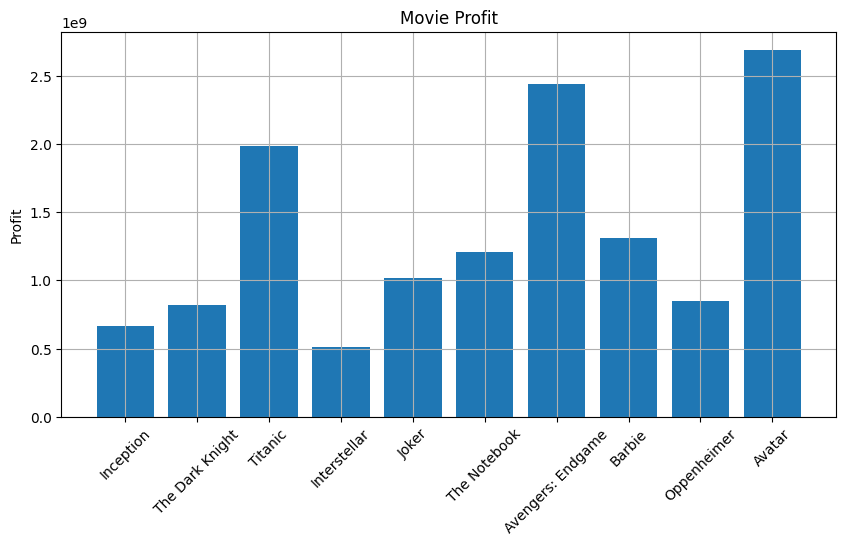

In [110]:
plt.figure(figsize=(10,5))
plt.bar(df['Title'], df['Profit'])
plt.xticks(rotation=45)
plt.title('Movie Profit')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


In [118]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, year, month

spark = SparkSession.builder.appName("MoviesAnalysis").getOrCreate()


df_spark = spark.read.csv("movies.csv", header=True, inferSchema=True)
df_spark.show()


+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1234567890| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
|      8|           Barbie|  Drama| 2023-07-21|   7.5|1456000000|145000000|
|      9|      Oppenheimer|  Drama| 2023-07-21|   8.6| 950000000|100000000|
|     10|           Avatar| Sci-Fi| 2009-12-18|   7.9|2923706026|237000000|
+-------+---

In [119]:

df_spark = df_spark.withColumn("Profit", col("Revenue") - col("Budget"))
df_spark.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1234567890| 29000000|1205567890|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
|      8|           Barbie|  Drama| 2023-07-21|   7.5|1456000000|145000000|1311000000|
|      9|      Oppenheimer|  Drama| 2023-07

In [113]:
filtered = df_spark.filter((col("Genre") == "Sci-Fi") & (col("Profit") > 500000000))
filtered.show()


+-------+------------+------+-----------+------+----------+---------+----------+
|MovieID|       Title| Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+------------+------+-----------+------+----------+---------+----------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|     10|      Avatar|Sci-Fi| 2009-12-18|   7.9|2923706026|237000000|2686706026|
+-------+------------+------+-----------+------+----------+---------+----------+



In [114]:
grouped = df_spark.groupBy("Genre").agg({"Rating":"avg", "Profit":"sum"})
grouped.show()


+-------+-----------------+-----------+
|  Genre|      avg(Rating)|sum(Profit)|
+-------+-----------------+-----------+
|Romance|             7.85| 3193031834|
|  Drama|8.166666666666666| 3180251311|
| Action|              8.7| 3261359008|
| Sci-Fi|8.433333333333332| 3864710129|
+-------+-----------------+-----------+



In [115]:
df_spark = df_spark.withColumn(
    "MovieType",
    when(col("Rating") == 9, "Blockbuster")
    .when((col("Rating") >= 8) & (col("Rating") < 9), "Hit")
    .otherwise("Average")
)
df_spark.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|  MovieType|
+-------+-----------------+-------+-----------+------+----------+---------+----------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1234567890| 29000000|1205567890|    Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|        Hit|
|      8| 

In [116]:
df_spark = df_spark.drop("Budget")
df_spark.show()


+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|  MovieType|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1234567890|1205567890|    Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Hit|
|      8|           Barbie|  Drama| 2023-07-21|   7.5|1456000000|1311000000|    Average|
|      9|      Oppenh

In [120]:
avg_rev = df_spark.selectExpr("avg(Revenue)").collect()[0][0]
df_spark = df_spark.na.fill({"Revenue": avg_rev})
df_spark.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1234567890| 29000000|1205567890|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
|      8|           Barbie|  Drama| 2023-07-21|   7.5|1456000000|145000000|1311000000|
|      9|      Oppenheimer|  Drama| 2023-07

In [124]:
df_spark = df_spark.withColumn("ReleaseDate", col("ReleaseDate").cast("date"))
df_spark = df_spark.withColumn("Year", year(col("ReleaseDate")))
df_spark = df_spark.withColumn("Month", month(col("ReleaseDate")))
df_spark.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Year|Month|
+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1234567890| 29000000|1205567890|2004|    6|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|2019|    4|
|      8|           

In [125]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank


In [126]:
windowSpec = Window.partitionBy("Genre").orderBy(col("Profit").desc())
df_spark = df_spark.withColumn("ProfitRank", rank().over(windowSpec))
df_spark.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Year|Month|ProfitRank|
+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|2019|    4|         1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|2008|    7|         2|
|      8|           Barbie|  Drama| 2023-07-21|   7.5|1456000000|145000000|1311000000|2023|    7|         1|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|2019|   10|         2|
|      9|      Oppenheimer|  Drama| 2023-07-21|   8.6| 950000000|100000000| 850000000|2023|    7|         3|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|1997|   12|         1|
|      6|     The N

In [128]:
path = '/content/mydrive/MyDrive/movies_bonus.json'
df_json = spark.read.json(path, multiLine=True)
df_json.show()


+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



In [131]:
df_merged = df_spark.unionByName(df_json, allowMissingColumns=True)
df_merged.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Year|Month|ProfitRank|
+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|2019|    4|         1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|2008|    7|         2|
|      8|           Barbie|  Drama| 2023-07-21|   7.5|1456000000|145000000|1311000000|2023|    7|         1|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|2019|   10|         2|
|      9|      Oppenheimer|  Drama| 2023-07-21|   8.6| 950000000|100000000| 850000000|2023|    7|         3|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|1997|   12|         1|
|      6|     The N

In [134]:
topfive = df_merged.orderBy(col("Revenue").desc()).limit(5)
topfive.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Year|Month|ProfitRank|
+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+
|     10|           Avatar| Sci-Fi| 2009-12-18|   7.9|2923706026|237000000|2686706026|2009|   12|         1|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|2019|    4|         1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|1997|   12|         1|
|      8|           Barbie|  Drama|       NULL|   7.5|1456000000|145000000|      NULL|NULL| NULL|      NULL|
|      8|           Barbie|  Drama| 2023-07-21|   7.5|1456000000|145000000|1311000000|2023|    7|         1|
+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+



In [135]:
df_merged.coalesce(1).write.csv("final_movies.csv", header=True)


In [136]:
df_merged = df_merged.withColumn("ROI", col("Profit") / col("Budget"))
roi_top = df_merged.filter(col("Budget") > 50000000).orderBy(col("ROI").desc())
roi_top.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+------------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Year|Month|ProfitRank|               ROI|
+-------+-----------------+-------+-----------+------+----------+---------+----------+----+-----+----------+------------------+
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|2019|   10|         2| 18.53184201818182|
|     10|           Avatar| Sci-Fi| 2009-12-18|   7.9|2923706026|237000000|2686706026|2009|   12|         1|11.336312345991562|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|1997|   12|         1|        9.93731972|
|      8|           Barbie|  Drama| 2023-07-21|   7.5|1456000000|145000000|1311000000|2023|    7|         1| 9.041379310344828|
|      9|      Oppenheimer|  Drama| 2023-07-21|   8.6| 950000000|100000000| 850000000|2023|    7|       